In [33]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans


In [34]:
data = pd.read_csv("Preprocessed_dataset.csv")
print("Dataset loaded successfully!")
display(data.head())

Dataset loaded successfully!


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,Age_Bin,Glucose_Bin
0,0.352941,0.680645,0.526316,0.271845,0.525,0.288945,0.491935,0.483333,1,40-49,Diabetes
1,0.058824,0.375806,0.467105,0.213592,0.525,0.201005,0.244624,0.166667,0,30-39,Prediabetes
2,0.470588,0.590323,0.434211,0.213592,0.525,0.144054,0.532258,0.183333,1,30-39,Diabetes
3,0.058824,0.400000,0.394737,0.155340,0.000,0.097990,0.079749,0.000000,0,20-29,Prediabetes
4,0.000000,0.567742,0.223684,0.271845,1.000,0.236181,1.000000,0.200000,1,30-39,Diabetes


In [35]:
# We will use 'Glucose' and 'BMI' because they are strong health indicators.
X = data[['Glucose', 'BMI']].values
print("Selected columns: Glucose and BMI")

Selected columns: Glucose and BMI


In [36]:
# Apply K-Means with three different K values (2, 3, 4)
for k in [2, 3, 4]:
    # Create and fit the K-Means model
    kmeans = KMeans(n_clusters=k, init='k-means++', random_state=0)
    y_kmeans = kmeans.fit_predict(X)

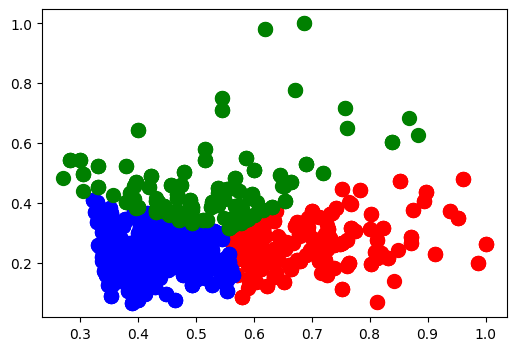

In [37]:
    # Plot the clusters
    plt.figure(figsize=(6, 4))
    plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1],
                s=100, c='red', label='Cluster 1')
    plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1],
                s=100, c='blue', label='Cluster 2')

    if k > 2:
        plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1],
                    s=100, c='green', label='Cluster 3')


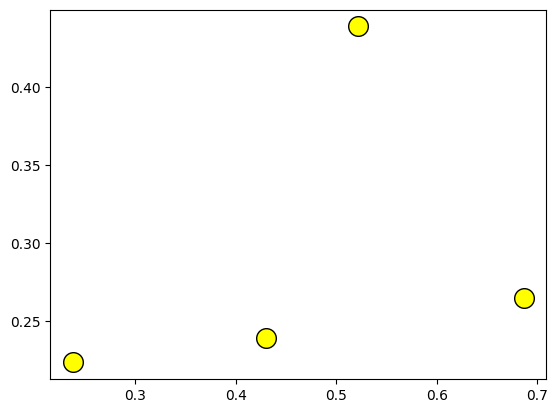

In [39]:
    # Plot the centroids
    plt.scatter(kmeans.cluster_centers_[:, 0],
                kmeans.cluster_centers_[:, 1],
                s=200, c='yellow', edgecolor='black', label='Centroids')


/tmp/ipython-input-3405720442.py:4: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


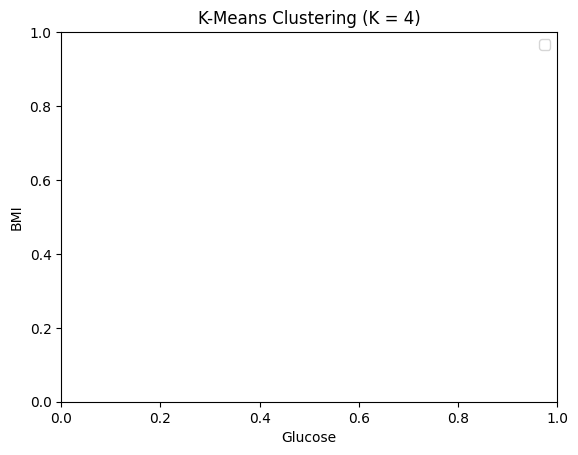

 K-Means executed successfully for K = 4
------------------------------------------------------------


In [40]:

    plt.title(f'K-Means Clustering (K = {k})')
    plt.xlabel('Glucose')
    plt.ylabel('BMI')
    plt.legend()
    plt.show()

    print(f" K-Means executed successfully for K = {k}")
    print("-" * 60)

K-Means Clustering Results

In this step, the K-Means clustering algorithm was applied to the preprocessed dataset using three different K values (2, 3, and 4).  
The two numeric features Glucose and BMI were selected because they are important health indicators that show noticeable variation among individuals.

- When K = 2, the data was divided into two simple groups due to close feature values.  
- When K = 3, three colored clusters appeared more clearly and evenly balanced, indicating that this value is the most appropriate.  
- When K = 4, the clusters overlapped and were less distinct, suggesting that increasing K did not improve the results.

Therefore, K = 3 is considered the most suitable number of clusters for this dataset.